# Hello World

In [29]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Statistics
import scipy.stats as stats

# Machine learning and preprocessing (optional but common)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [30]:
sales_df = pd.read_csv('./sales.csv')

In [31]:
sales_df.head()         # View first few rows
sales_df.tail()         # View last few rows
sales_df.shape          # (rows, columns)
sales_df.columns        # Column names
sales_df.info()         # Data types and non-null counts
sales_df.describe()     # Summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640840 entries, 0 to 640839
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Unnamed: 0           640840 non-null  int64 
 1   store_ID             640840 non-null  int64 
 2   day_of_week          640840 non-null  int64 
 3   date                 640840 non-null  object
 4   nb_customers_on_day  640840 non-null  int64 
 5   open                 640840 non-null  int64 
 6   promotion            640840 non-null  int64 
 7   state_holiday        640840 non-null  object
 8   school_holiday       640840 non-null  int64 
 9   sales                640840 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 48.9+ MB


,Unnamed: 0,store_ID,day_of_week,nb_customers_on_day,open,promotion,school_holiday,sales
count,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000,640840.000000
mean,355990.675084,558.211348,4.000189,633.398577,0.830185,0.381718,0.178472,5777.469011
std,205536.290268,321.878521,1.996478,464.094416,0.375470,0.485808,0.382910,3851.338083
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,178075.750000,280.000000,2.000000,405.000000,1.000000,0.000000,0.000000,3731.000000
50%,355948.500000,558.000000,4.000000,609.000000,1.000000,0.000000,0.000000,5746.000000
75%,533959.250000,837.000000,6.000000,838.000000,1.000000,1.000000,0.000000,7860.000000
max,712044.000000,1115.000000,7.000000,5458.000000,1.000000,1.000000,1.000000,41551.000000


In [32]:
#Understanding the data
#First of all, we'll drop the first column (unnamed):
sales_df = sales_df.drop('Unnamed: 0',axis=1)

In [33]:
sales_df.head()

,store_ID,day_of_week,date,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales
0,366,4,2013-04-18,517,1,0,0,0,4422
1,394,6,2015-04-11,694,1,0,0,0,8297
2,807,4,2013-08-29,970,1,1,0,0,9729
3,802,2,2013-05-28,473,1,1,0,0,6513
4,726,4,2013-10-10,1068,1,1,0,0,10882


In [34]:
sales_df['date'] = pd.to_datetime(sales_df['date'])

# Extract year, month, and day into separate columns
sales_df['year'] = sales_df['date'].dt.year
sales_df['month'] = sales_df['date'].dt.month
sales_df['day'] = sales_df['date'].dt.day
sales_df

#now drop original date column:
sales_df = sales_df.drop('date',axis=1)
sales_df

,store_ID,day_of_week,nb_customers_on_day,open,promotion,state_holiday,school_holiday,sales,year,month,day
0,366,4,517,1,0,0,0,4422,2013,4,18
1,394,6,694,1,0,0,0,8297,2015,4,11
2,807,4,970,1,1,0,0,9729,2013,8,29
3,802,2,473,1,1,0,0,6513,2013,5,28
4,726,4,1068,1,1,0,0,10882,2013,10,10
...,...,...,...,...,...,...,...,...,...,...,...
640835,409,6,483,1,0,0,0,4553,2013,10,26
640836,97,1,987,1,1,0,0,12307,2014,4,14
640837,987,1,925,1,0,0,0,6800,2014,7,7
640838,1084,4,725,1,0,0,0,5344,2014,6,12


In [38]:
# Filter rows where 'open' is 0
sales_when_closed = sales_df[sales_df['open'] == 0]['sales']

# Display the result
print(sales_when_closed)

sales_when_closed.value_counts()

6         0
10        0
18        0
34        0
35        0
         ..
640807    0
640812    0
640814    0
640834    0
640839    0
Name: sales, Length: 108824, dtype: int64


sales
0    108824
Name: count, dtype: int64

In [39]:
#When it comes to 'open' column, we would like to remove the rows where value is 0, as it means that the store was closed. Therefore, sales will be 0. 

days_open_sales_df = sales_df[sales_df['open'] != 0]

#drop 'open' column, as we've already filtered the results: 
days_open_sales_df.drop('open', axis=1, inplace=True)
days_open_sales_df.shape

C:\Users\jefit\AppData\Local\Temp\ipykernel_16792\3436553232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_open_sales_df.drop('open', axis=1, inplace=True)


(532016, 10)

In [40]:
#let's work on 'state holiday' column:
# We can see that dtype for state holiday column is object. However, the values are either 0 or 1 (boolean variable):
days_open_sales_df['state_holiday'].value_counts()

mapping = {'0': 0, 'a': 1, 'b': 1, 'c': 1}
days_open_sales_df['state_holiday'] = days_open_sales_df['state_holiday'].map(mapping)

days_open_sales_df['state_holiday'].value_counts()

C:\Users\jefit\AppData\Local\Temp\ipykernel_16792\590106932.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  days_open_sales_df['state_holiday'] = days_open_sales_df['state_holiday'].map(mapping)


state_holiday
0    531437
1       579
Name: count, dtype: int64

In [41]:
#Check value counts for 'school_holiday' column:

days_open_sales_df['school_holiday'].value_counts()

school_holiday
0    429215
1    102801
Name: count, dtype: int64

In [42]:
#Check null values:
days_open_sales_df.isnull().sum()

store_ID               0
day_of_week            0
nb_customers_on_day    0
promotion              0
state_holiday          0
school_holiday         0
sales                  0
year                   0
month                  0
day                    0
dtype: int64

<Axes: >

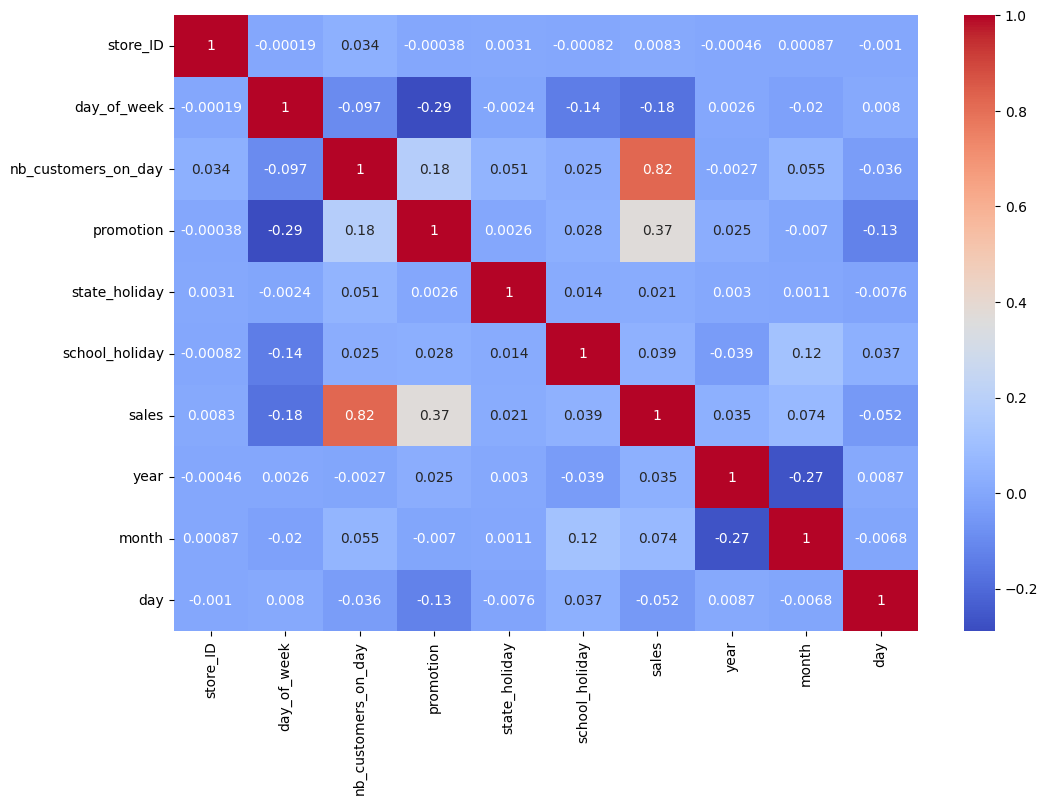

In [43]:
#check colinearity between variables:
plt.figure(figsize=(12, 8))
corr = days_open_sales_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [44]:
# In the above graph, we cannot see any strong correlation between two variables. The only remarkable one is nb_customers_on_day and sales volume, which is expected. 
# However, as the correlation between thee two is below 0.85, we will leave both for now.

In [45]:
days_open_sales_df.describe()

print(days_open_sales_df['nb_customers_on_day'].nlargest(10).tolist())
print(days_open_sales_df['nb_customers_on_day'].nsmallest(10).tolist())

print(days_open_sales_df['sales'].nlargest(10).tolist())
print(days_open_sales_df['sales'].nsmallest(10).tolist())



[5458, 5387, 5297, 5192, 5152, 5145, 5132, 5112, 5069, 5063]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[41551, 38722, 38484, 38367, 38037, 38025, 37403, 37376, 37122, 36227]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


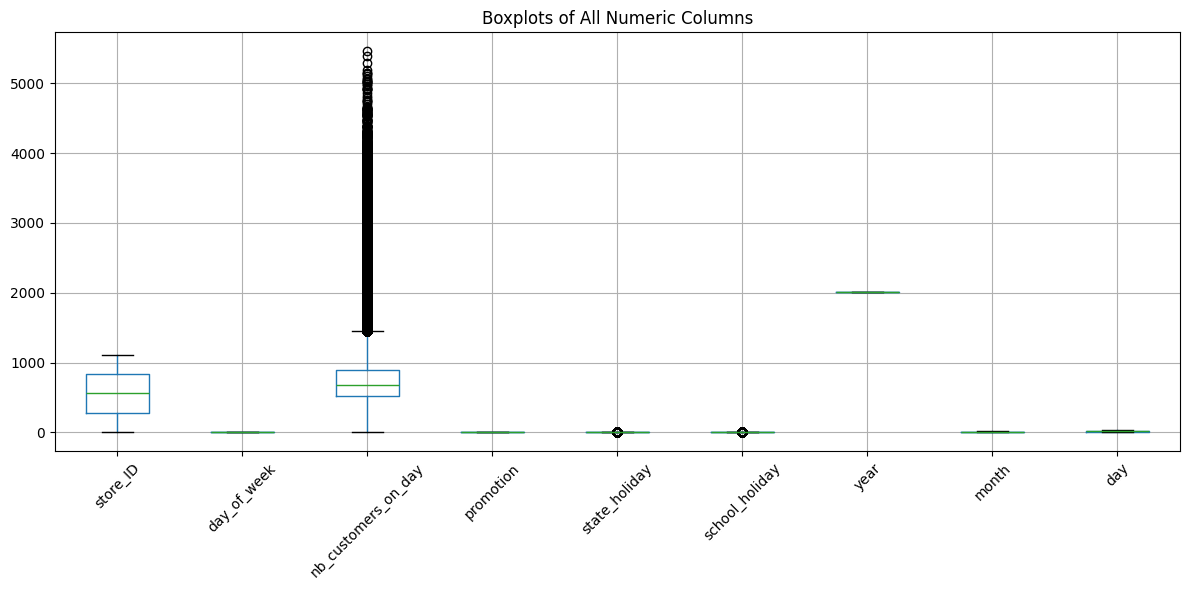

In [47]:
import matplotlib.pyplot as plt

# Create boxplots for all numeric columns
days_open_sales_df.drop('sales',axis=1).boxplot(figsize=(12, 6))
plt.title("Boxplots of All Numeric Columns")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

# Select numeric columns
numeric_cols = days_open_sales_df.select_dtypes(include='number').columns

# Set up the plot grid
n_cols = 3  # Number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

plt.figure(figsize=(n_cols * 5, n_rows * 4))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(days_open_sales_df['nb_customers_on_day'], kde=True, bins=30).
    plt.title(f'{col}\nSkewness: {skew(days_open_sales_df['nb_customers_on_day'].dropna()):.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

SyntaxError: invalid syntax (2087856370.py, line 16)